In [1]:
import pandas as pd
import plotly.graph_objects as go
from dash import dcc, html, Input, Output

**Milestone #1 - Data cleaning and data exploration**

### I found this dataset at kaggle and it is supposed to be a delivery delay prediction problem but I am going to use it for visualization purposes. I found the original source to the dataset and it was used in the Data-driven Logistics and Supply Chain Competition INCOM 2024 in collaboration with the Centre for Autonomous and Intelligent Systems (CAIS) at the University of Huddersfield, and Supply Chain and Operations Management at The Berlin School of Economics and Law. This exact data was provided by Cambridge University for this competition  but the data itself was provided only to the registered participants which I found on kaggle. 
- All the links can be found below: 
- https://www.ifm.eng.cam.ac.uk/research/supply-chain-ai-lab/data-competition/ 
- https://www.kaggle.com/datasets/pushpitkamboj/logistics-data-containing-real-world-data/data
- https://www.incom2024.org/data-challenge/ 
  

In [2]:
df = pd.read_csv('supply_chain_dataset.csv')
df.head(5)

payment_type  profit_per_order  sales_per_customer  category_id  \
0        DEBIT         34.448338            92.49099          9.0   
1     TRANSFER         91.193540           181.99008         48.0   
2        DEBIT          8.313806            89.96643         46.0   
3     TRANSFER        -89.463196            99.15065         17.0   
4        DEBIT         44.722590           170.97824         48.0   

          category_name customer_city customer_country  customer_id  \
0      Cardio Equipment        Caguas      Puerto Rico   12097.6830   
1          Water Sports   Albuquerque          EE. UU.    5108.1045   
2  Indoor/Outdoor Games      Amarillo      Puerto Rico    4293.4478   
3                Cleats        Caguas      Puerto Rico     546.5306   
4          Water Sports       Peabody          EE. UU.    1546.3980   

  customer_segment customer_state  ...     order_region  \
0         Consumer             PR  ...   Western Europe   
1         Consumer             CA  ...    South America   
2         Consumer             PR  ...   Western Europe   
3         Consumer             PR  ...  Central America   
4         Consumer             CA  ...  Central America   

                  order_state order_status  product_card_id  \
0                      Vienna     COMPLETE            191.0   
1                Buenos Aires      PENDING           1073.0   
2  Nord-Pas-de-Calais-Picardy     COMPLETE           1014.0   
3                   Santa Ana   PROCESSING            365.0   
4                    Illinois     COMPLETE           1073.0   

   product_category_id                       product_name product_price  \
0                  9.0  Nike Men's Free 5.0+ Running Shoe         99.99   
1                 48.0        Pelican Sunstream 100 Kayak        199.99   
2                 46.0   O'Brien Men's Neoprene Life Vest         49.98   
3                 17.0   Perfect Fitness Perfect Rip Deck         59.99   
4                 48.0        Pelican Sunstream 100 Kayak        199.99   

               shipping_date   shipping_mode label  
0  2015-08-13 00:00:00+01:00  Standard Class    -1  
1  2017-04-09 00:00:00+01:00  Standard Class    -1  
2  2015-03-18 00:00:00+00:00    Second Class     1  
3  2017-03-18 00:00:00+00:00    Second Class     0  
4  2015-03-30 00:00:00+01:00  Standard Class     1  

[5 rows x 41 columns]

In [3]:
#There were also provided the description of the dataset and it's content 
df_description = pd.read_csv('supply_chain.csv')
df_description

variable_name         type  \
0               payment_type  categorical   
1           profit_per_order    numerical   
2         sales_per_customer    numerical   
3                category_id    numerical   
4              category_name         text   
5              customer_city  categorical   
6           customer_country  categorical   
7                customer_id    numerical   
8           customer_segment  categorical   
9             customer_state  categorical   
10          customer_zipcode         text   
11             department_id    numerical   
12           department_name         text   
13                  latitude    numerical   
14                 longitude    numerical   
15                    market  categorical   
16                order_city  categorical   
17             order_country  categorical   
18         order_customer_id    numerical   
19                order_date     datetime   
20                  order_id    numerical   
21    order_item_cardprod_id    numerical   
22       order_item_discount    numerical   
23  order_item_discount_rate    numerical   
24             order_item_id    numerical   
25  order_item_product_price    numerical   
26   order_item_profit_ratio    numerical   
27       order_item_quantity    numerical   
28                     sales    numerical   
29   order_item_total_amount    numerical   
30    order_profit_per_order    numerical   
31              order_region  categorical   
32               order_state  categorical   
33              order_status  categorical   
34           product_card_id    numerical   
35       product_category_id    numerical   
36              product_name         text   
37             product_price    numerical   
38             shipping_date     datetime   
39             shipping_mode  categorical   
40                     label  categorical   

                                          description  
0                            Type of transaction made  
1                           Earnings per order placed  
2          Total sales per customer made per customer  
3                               Product category code  
4                 Description of the product category  
5           City where the customer made the purchase  
6        Country where the customer made the purchase  
7                                         Customer ID  
8   Types of Customers Consumer, Corporate, Home O...  
9   State to which the store where the purchase is...  
10                                   Customer Zipcode  
11                           Department code of store  
12                           Department name of store  
13        Latitude corresponding to location of store  
14       Longitude corresponding to location of store  
15  Market to where the order is delivered: Africa...  
16                      Destination city of the order  
17                   Destination country of the order  
18                                Customer order code  
19                    Date on which the order is made  
20                                         Order code  
21     Product code generated through the RFID reader  
22                          Order item discount value  
23                     Order item discount percentage  
24                                    Order item code  
25                 Price of products without discount  
26                            Order Item Profit Ratio  
27                       Number of products per order  
28                                     Value in sales  
29                             Total amount per order  
30                             Order Profit Per Order  
31  Region of the world where the order is deliver...  
32   State of the region where the order is delivered  
33  Order Status: COMPLETE, PENDING, CLOSED, PENDI...  
34                                       Product code  
35                              Product category code  
36                                       Product nam

In [4]:
#Accesing all column names for further analysis 
df.keys()

Index(['payment_type', 'profit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id', 'order_date',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total_amount', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date', 'shipping_mode',
       'label'],
      dtype='object')

## Data cleaning: ##

1. Format the date in order_date and shipping_date columns
2. Drop unnecessarily columns that may not directly contribute to my analysis and visualizations: 
- IDs and Redundant Identifiers:
- category_id
- customer_id
- department_id
- order_customer_id
- order_id
- order_item_cardprod_id
- order_item_id
- product_card_id
- product_category_id
- latitude and longitude as well as customer_zipcode columns can also be dropped since i dont need detailed location plotting.  


In [5]:
#Trying to see if i need to drop another location columns that might be repeating 
df[['order_city', 'order_country', 'order_state', 'customer_city', 'customer_country', 'customer_state']].head(10)

order_city  order_country                 order_state customer_city  \
0         Viena        Austria                      Vienna        Caguas   
1  Buenos Aires      Argentina                Buenos Aires   Albuquerque   
2        Burnie         France  Nord-Pas-de-Calais-Picardy      Amarillo   
3     Santa Ana    El Salvador                   Santa Ana        Caguas   
4      Blumenau         Mexico                    Illinois       Peabody   
5  Philadelphia  United States                Pennsylvania        Caguas   
6   Los Angeles  United States                  California        Caguas   
7  Philadelphia  United States                Pennsylvania        Caguas   
8       Bangkok       Thailand                     Bangkok       Hanford   
9  Villahermosa         Mexico                     Tabasco        Caguas   

  customer_country customer_state  
0      Puerto Rico             PR  
1          EE. UU.             CA  
2      Puerto Rico             PR  
3      Puerto Rico             PR  
4          EE. UU.             CA  
5      Puerto Rico             PR  
6      Puerto Rico             PR  
7      Puerto Rico             PR  
8          EE. UU.             KY  
9      Puerto Rico             PR

3. order_city, order_state, customer_city and customer_state can be also dropped. I'm going to leave only order_country with customer_country information. Also the name EE.UU represents United States in spanish, it should be renamed. 

In [6]:
#Checking another potential repeating information
df[['order_profit_per_order', 'profit_per_order',]].head(10)

order_profit_per_order  profit_per_order
0               32.083145         34.448338
1               91.235870         91.193540
2                6.965549          8.313806
3              -95.401400        -89.463196
4               44.569000         44.722590
5               81.087910         76.100400
6              -72.914665        -54.345290
7             -169.014340       -163.628400
8               27.000895         29.792816
9               11.838907         12.527968

4.  I am going to drop the order_profit_per_order column since i cant find the description good enough to tell the difference between it and profit_per_order column. 

In [7]:
#Checking for null values - theres no null values in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

## Data Cleaning process ##

In [8]:
# Converting to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], utc=True)
df['shipping_date'] = pd.to_datetime(df['shipping_date'], utc=True)
def format_date(date):
    if pd.notnull(date):
        return date.strftime('%Y-%m-%d')
    return None
    
df['order_date'] = df['order_date'].apply(format_date)
df['shipping_date'] = df['shipping_date'].apply(format_date)


In [9]:
# Seeing if the new dateformat looks better 
df[['order_date','shipping_date']].head(5)

order_date shipping_date
0  2015-08-11    2015-08-12
1  2017-02-10    2017-04-08
2  2015-01-01    2015-03-18
3  2017-05-30    2017-03-18
4  2015-03-28    2015-03-29

In [10]:
#Dropping the listed above columns 
columns_to_drop = [
    'category_id',
    'customer_id',
    'department_id',
    'order_customer_id',
    'order_id',
    'order_item_cardprod_id',
    'order_item_id',
    'latitude',
    'longitude',
    'customer_zipcode',
    'order_city',
    'order_state',
    'customer_city',
    'customer_state',
    'product_card_id',
    'product_category_id',
    'order_profit_per_order'
]
df.drop(columns=columns_to_drop, inplace=True)
df.head(5) #Now i have 24 columns instead of 41 so it should be easier to work with 

payment_type  profit_per_order  sales_per_customer         category_name  \
0        DEBIT         34.448338            92.49099      Cardio Equipment   
1     TRANSFER         91.193540           181.99008          Water Sports   
2        DEBIT          8.313806            89.96643  Indoor/Outdoor Games   
3     TRANSFER        -89.463196            99.15065                Cleats   
4        DEBIT         44.722590           170.97824          Water Sports   

  customer_country customer_segment department_name  market order_country  \
0      Puerto Rico         Consumer        Footwear  Europe       Austria   
1          EE. UU.         Consumer        Fan Shop   LATAM     Argentina   
2      Puerto Rico         Consumer        Fan Shop  Europe        France   
3      Puerto Rico         Consumer         Apparel   LATAM   El Salvador   
4          EE. UU.         Consumer        Fan Shop   LATAM        Mexico   

   order_date  ...  order_item_quantity   sales  order_item_total_amount  \
0  2015-08-11  ...                  1.0   99.99                 84.99157   
1  2017-02-10  ...                  1.0  199.99                181.99000   
2  2015-01-01  ...                  2.0   99.96                 93.81015   
3  2017-05-30  ...                  2.0  119.98                 99.89060   
4  2015-03-28  ...                  1.0  199.99                171.07587   

      order_region  order_status                       product_name  \
0   Western Europe      COMPLETE  Nike Men's Free 5.0+ Running Shoe   
1    South America       PENDING        Pelican Sunstream 100 Kayak   
2   Western Europe      COMPLETE   O'Brien Men's Neoprene Life Vest   
3  Central America    PROCESSING   Perfect Fitness Perfect Rip Deck   
4  Central America      COMPLETE        Pelican Sunstream 100 Kayak   

   product_price shipping_date   shipping_mode label  
0          99.99    2015-08-12  Standard Class    -1  
1         199.99    2017-04-08  Standard Class    -1  
2          49.98    2015-03-18    Second Class     1  
3          59.99    2017-03-18    Second Class     0  
4         199.99    2015-03-29  Standard Class     1  

[5 rows x 24 columns]

In [11]:
#Checking new columns 
df.keys()

Index(['payment_type', 'profit_per_order', 'sales_per_customer',
       'category_name', 'customer_country', 'customer_segment',
       'department_name', 'market', 'order_country', 'order_date',
       'order_item_discount', 'order_item_discount_rate',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total_amount',
       'order_region', 'order_status', 'product_name', 'product_price',
       'shipping_date', 'shipping_mode', 'label'],
      dtype='object')

In [12]:
#Renaming the EE. UU.	to United States in the customer_country column 
df['customer_country'] = df['customer_country'].replace('EE. UU.', 'United States')
df[['customer_country']].head(5) # Checking for new word 

customer_country
0      Puerto Rico
1    United States
2      Puerto Rico
3      Puerto Rico
4    United States

## Exploratory data analysis ##

In [13]:
df.describe() #getting basic stats from the dataset 

profit_per_order  sales_per_customer  order_item_discount  \
count      15549.000000        15549.000000         15549.000000   
mean          22.604542          179.888256            20.782118   
std           99.265198          113.727323            22.953833   
min        -3442.500000            8.351162             0.000000   
25%            7.562795          104.397330             6.000000   
50%           31.693370          165.944170            14.588252   
75%           63.872166          242.440930            30.000000   
max          911.800000         1939.990000           500.000000   

       order_item_discount_rate  order_item_product_price  \
count              15549.000000              15549.000000   
mean                   0.102717                137.005272   
std                    0.070101                134.545269   
min                    0.000000                  9.990000   
25%                    0.040000                 50.000000   
50%                    0.100000                 59.990000   
75%                    0.160000                199.990000   
max                    0.250000               1999.990000   

       order_item_profit_ratio  order_item_quantity         sales  \
count             15549.000000         15549.000000  15549.000000   
mean                  0.120391             2.165202    200.562289   
std                   0.474088             1.468627    125.984986   
min                  -2.750000             1.000000      9.990000   
25%                   0.080000             1.000000    119.980000   
50%                   0.270000             1.000000    199.920000   
75%                   0.360000             3.000000    299.950000   
max                   0.500000             5.000000   1999.990000   

       order_item_total_amount  product_price         label  
count             15549.000000   15549.000000  15549.000000  
mean                179.780850     136.629368      0.349283  
std                 110.999735     133.366285      0.826623  
min                   7.490000       9.990000     -1.000000  
25%                 105.570910      50.000000      0.000000  
50%                 165.990000      59.990000      1.000000  
75%                 242.436400     199.990000      1.000000  
max                1939.990000    1999.990000      1.000000

In [14]:
#Frequency Counts to identify potential trends 
df['customer_country'].value_counts()

customer_country
United States    9438
Puerto Rico      6111
Name: count, dtype: int64

In [15]:
#Frequency Counts to identify potential trends 
df['category_name'].value_counts()

category_name
Cleats                  2212
Men's Footwear          1931
Women's Apparel         1906
Indoor/Outdoor Games    1657
Fishing                 1426
Water Sports            1391
Camping & Hiking        1127
Shop By Sport           1056
Cardio Equipment        1049
Electronics              219
Accessories              123
Golf Balls               120
Golf Gloves              101
Girls' Apparel            76
Crafts                    63
Video Games               63
Children's Clothing       59
Trade-In                  58
Cameras                   57
Music                     55
Women's Clothing          52
Golf Shoes                52
Baseball & Softball       51
Pet Supplies              46
Hockey                    44
Hunting & Shooting        42
Toys                      38
Lacrosse                  37
Garden                    33
Boxing & MMA              33
DVDs                      32
Soccer                    29
Tennis & Racquet          29
Books                     28


<Axes: xlabel='order_date'>

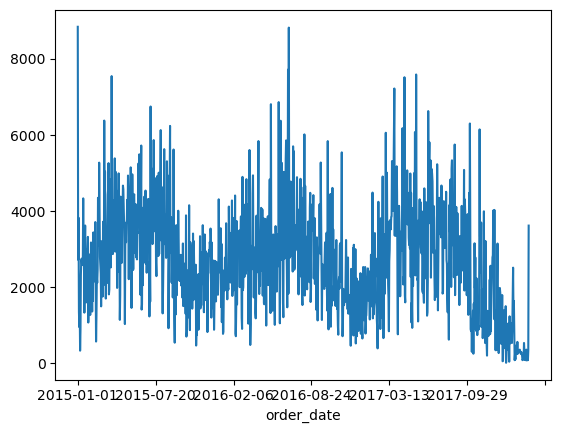

In [16]:
#creating a simple plot to see if i can get any insights from it
df.groupby('order_date')['sales'].sum().plot()
#I can definetly see some pattern and seasonality in this plot so i can explore this relationship in further analysis

### I have made my dataset more manageable and focused by completing the data cleaning process, which included removing unnecessary columns and renaming some objects in them.  By doing so, the data is now clearer and will be easier to visualize by lowering noise and improving the interpretability of visual outputs. My future visualizations will be supported by this foundational work, which will enable me to develop meaningful and targeted graphs and dashboards that highlight the most important features of the data. Since i didnt have a dataset when i was doing my final project proposal i want to re-arrange my initial questions that it can be directly correlated to my dataset that i have now. 
- What is the distribution of sales across different customer segments?
- What are the average order values by country, and which locations have higher spending customers? 
- Which product categories or departments are the most profitable?
- What is the average order value and profit per customer or order region?


### I might find some additional questions to be asked if i will find any more relationship in the data. I did a brief exploratory analysis and i want to move the futher EDA to my second milestone with my cleaned data ###

### Overall i am satisfied with my milestones and the work i did with the dataset and feel confident enough to move forward with this project. ###

## Milestone #2 ##

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

With data cleaning and initial exploration complete, I’m now ready to create visualizations using Seaborn and Plotly, as we’ve covered this semester.

I want to create a better graph for the order_date x sales plot ive made earlier since it's clustered and unreadable

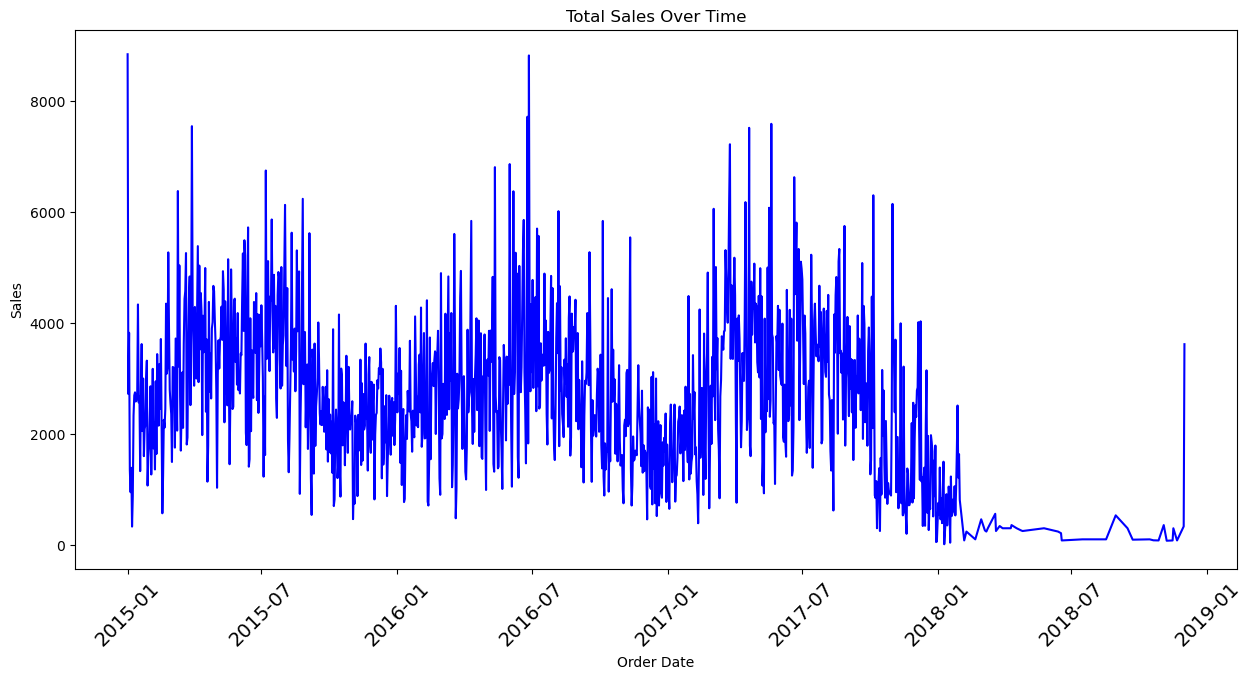

In [18]:
# In the cleaning process i changed the date format and left it as a string so now i cant access it as an object. Fixing it now for the visualizations
df['order_date'] = pd.to_datetime(df['order_date'], utc=True)
df['shipping_date'] = pd.to_datetime(df['shipping_date'], utc=True)

sales_by_date = df.groupby('order_date')['sales'].sum()

# Creating the plot
plt.figure(figsize=(15, 7))
sns.lineplot(x=sales_by_date.index, y=sales_by_date.values, color="blue")
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45, color='black', fontsize=14) 
plt.show()

This view provides a clearer picture of sales trends over the four-year period, highlighting seasonal fluctuations. Sales tended to be lower at the start of each year and peaked during the summer months. Let’s create a bar chart to identify which months had the highest and lowest sales.

/var/folders/th/h5wysqq52w99x0m1_y3_zsbm0000gn/T/ipykernel_23350/2466349669.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['order_date'].dt.to_period('M') #converting the order_date values into a period representing the month and year. This format is useful for time series analysis


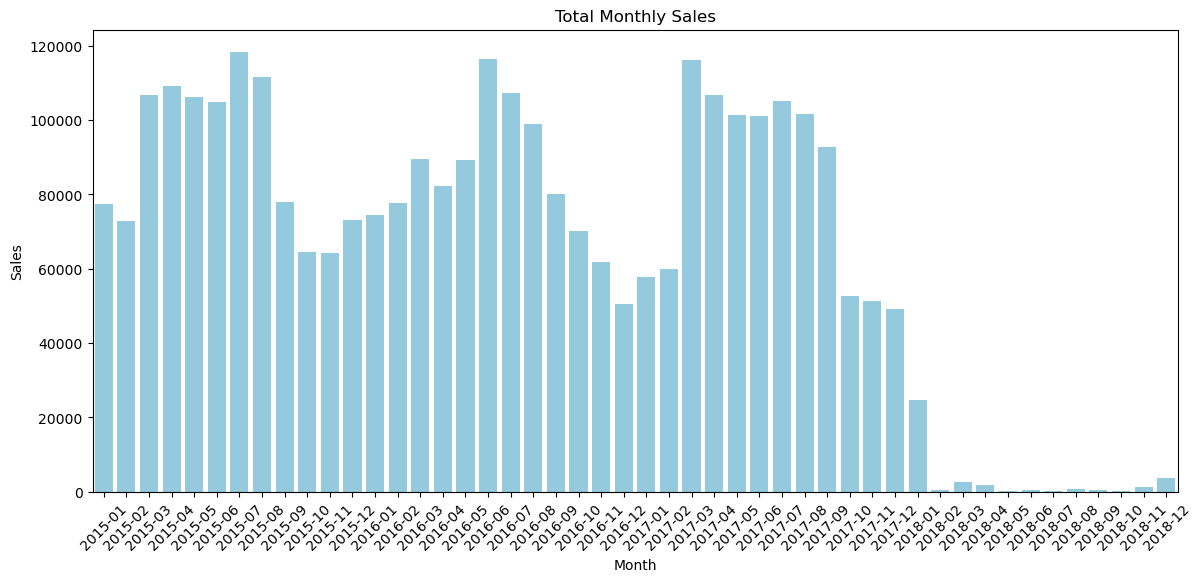

In [19]:
# Let's create a new column and then aggregate sales by this new column for useful summarization data at a monthly level. 
# Creating a new column for month-year
df['month_year'] = df['order_date'].dt.to_period('M') #converting the order_date values into a period representing the month and year. This format is useful for time series analysis
# Aggregating sales by month
monthly_sales = df.groupby('month_year')['sales'].sum().reset_index() #converting the result from a grouped object back into a regular df, with the group labels (month and year) as a separate column.
plt.figure(figsize=(14, 6))
sns.barplot(x='month_year', y='sales', data=monthly_sales, color="skyblue")
plt.xticks(rotation=45)
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

The chart clearly shows a drop in sales during the fall and winter months, with a noticeable pickup starting in March. Additionally, 2018 reported almost zero sales. To enhance this analysis, I want to make the chart interactive, allowing you to view the sales amount for each month and include a slicer for a closer look at specific months. I will be using plotly express for this chart. 

In [20]:

# Creating a month-year column again and converting it to timestamp for Plotly because i ran into an error saying Plotly does not support the Period type from pandas directly in JSON serialization
df['month_year'] = df['order_date'].dt.to_period('M').dt.to_timestamp()

# Aggregate sales by month
monthly_sales = df.groupby('month_year')['sales'].sum().reset_index()



/var/folders/th/h5wysqq52w99x0m1_y3_zsbm0000gn/T/ipykernel_23350/3586866098.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['order_date'].dt.to_period('M').dt.to_timestamp()


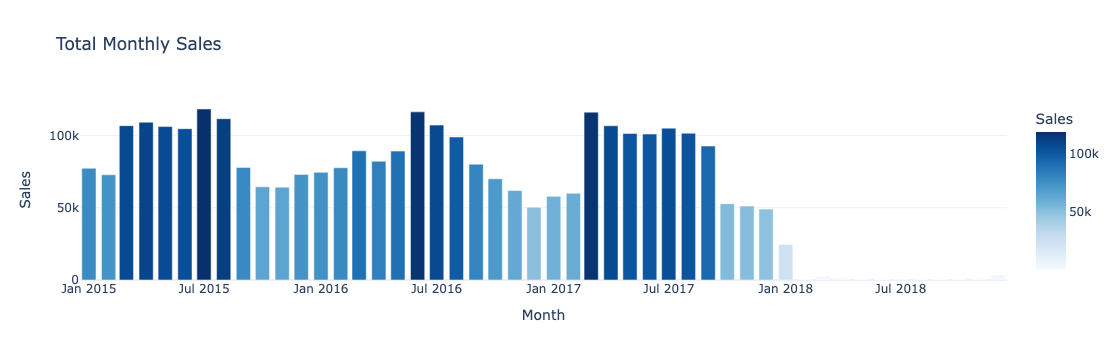

In [21]:
fig = px.bar(
    monthly_sales,
    x='month_year',
    y='sales',
    title='Total Monthly Sales',
    labels={'month_year': 'Month', 'sales': 'Sales'},
    color='sales',  
    color_continuous_scale='Blues',
    template='plotly_white' #Removing the grey grid 
)
fig.show()

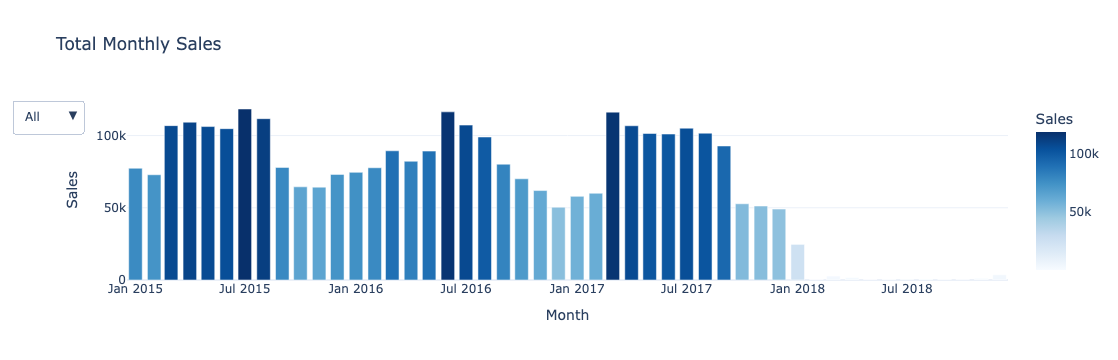

In [22]:
# Adding dropdown filters for year and month
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {"label": "All", "method": "relayout", "args": [{"xaxis.range": [monthly_sales['month_year'].min(), monthly_sales['month_year'].max()]}]},
                {"label": "2015", "method": "relayout", "args": [{"xaxis.range": ["2015-01-01", "2015-12-31"]}]},
                {"label": "2016", "method": "relayout", "args": [{"xaxis.range": ["2016-01-01", "2016-12-31"]}]},
                {"label": "2017", "method": "relayout", "args": [{"xaxis.range": ["2017-01-01", "2017-12-31"]}]},
                {"label": "2018", "method": "relayout", "args": [{"xaxis.range": ["2018-01-01", "2018-12-31"]}]}
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig.show()


Now i have an interactive bar graph represeting total sales by month which looks clean and easily readable. 

After this i want to move to the next question: What is the distribution of sales across different customer segments?

In [23]:
# Preparing the data for the graph
sales_by_segment = df.groupby('customer_segment')['sales'].sum().reset_index()

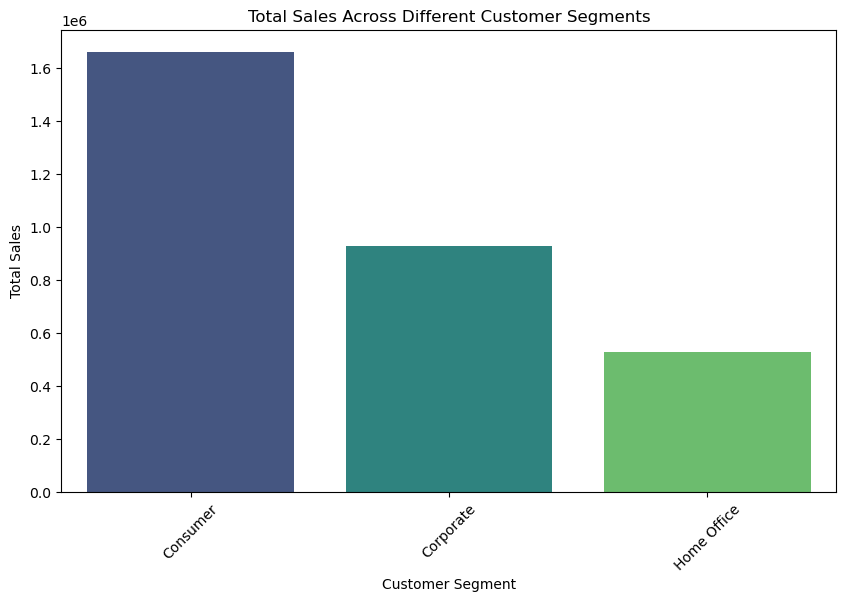

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_segment, x='customer_segment', y='sales', palette='viridis', hue='customer_segment', legend=False)
plt.title('Total Sales Across Different Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


This graph is very simple even if its clearly presenting the information from the dataset. I want to do something different rather than a bar graph.

/var/folders/th/h5wysqq52w99x0m1_y3_zsbm0000gn/T/ipykernel_23350/1852237331.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




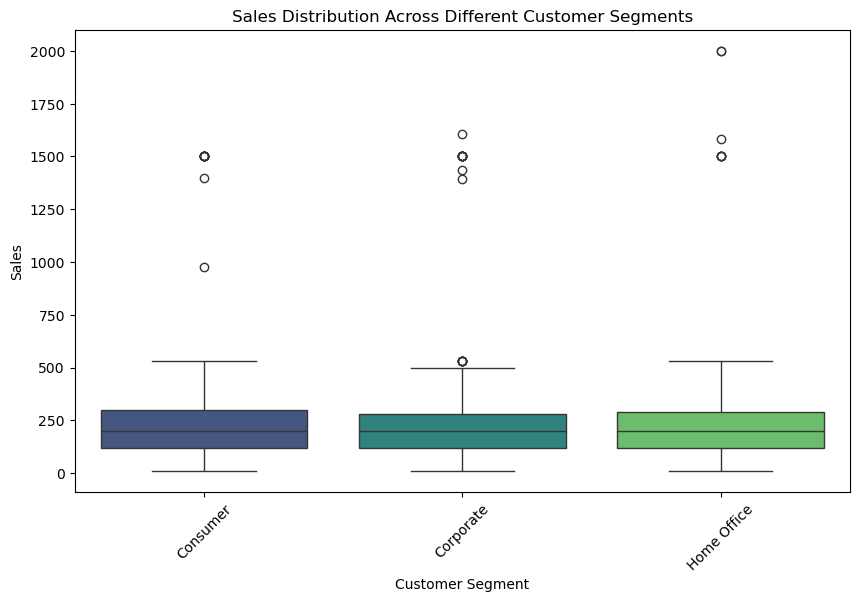

In [25]:
#Let's play around different graphs to find something more eye-catching and more informative
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='customer_segment', y='sales', palette='viridis')
plt.title('Sales Distribution Across Different Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Box plot is informative but my goal wasn't to find outliers in the data even though for statistical analysis it's good to know that they are present for futher z score testing for example.

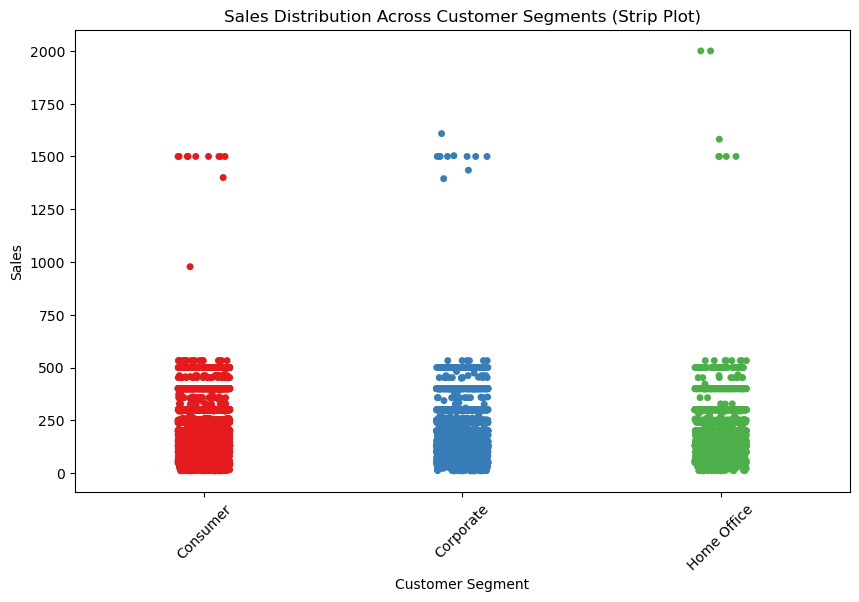

In [26]:
#Testing different graphs 
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='customer_segment', y='sales', hue='customer_segment', palette='Set1', jitter=True, legend=False)
plt.title('Sales Distribution Across Customer Segments (Strip Plot)')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

You can see a more clearer data distribution here by points but it's still too specific and unnecessary. 

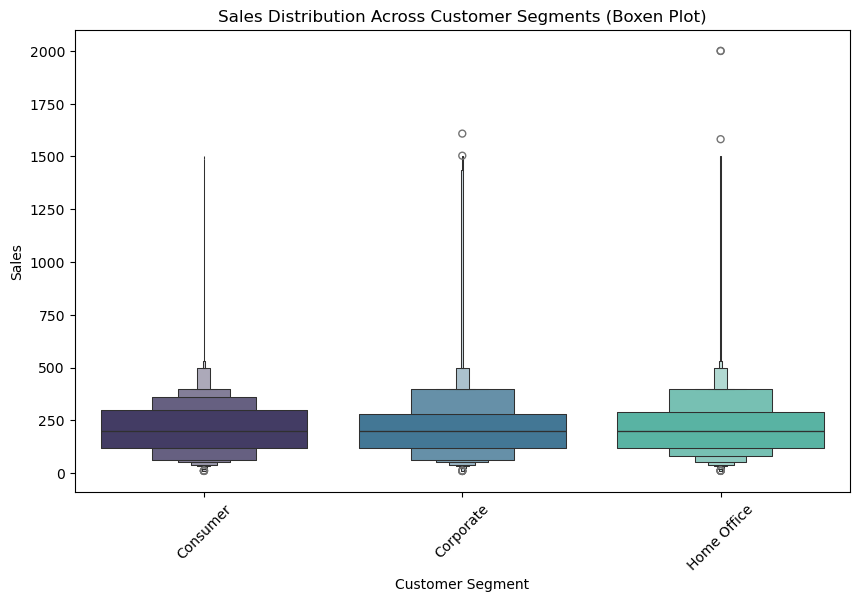

In [27]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='customer_segment', y='sales', hue='customer_segment', palette='mako', legend=False)
plt.title('Sales Distribution Across Customer Segments (Boxen Plot)')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

This is just another version of the box plot that i will not be using futher. I want to see the categories within the customers segmentation as well.

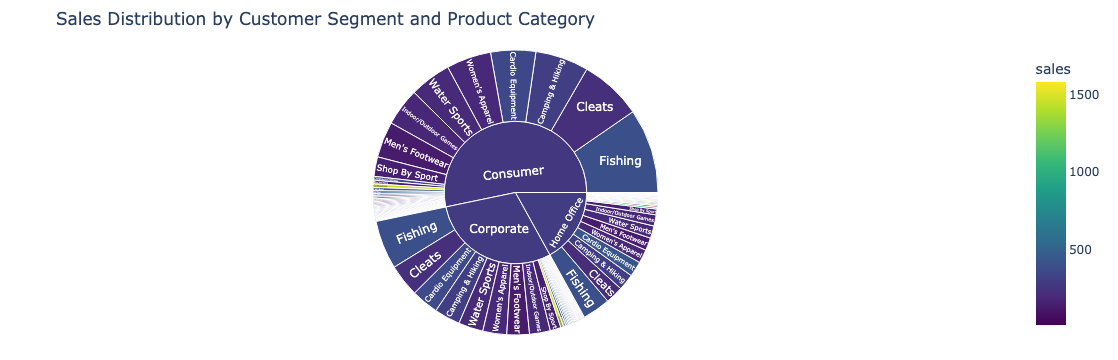

In [28]:
# Let's try something different 
fig = px.sunburst(df, path=['customer_segment', 'category_name'], values='sales',
                  title='Sales Distribution by Customer Segment and Product Category',
                  color='sales', color_continuous_scale='viridis')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

Now this is a hierarchical visualization of sales distribution, with the outer ring representing customer segments and the inner ring representing product categories.

It looks cluterred and unreadable and too overwhelming. I want to sort out only top 5 categories to be shown. Let's fix it:

In [29]:
# Aggregating sales by customer segment and category
category_sales = df.groupby(['customer_segment', 'category_name'])['sales'].sum().reset_index()

# Defining top 5 categories per segment
top_n = 5  

# Sorting and filtering the top 5 categories by sales for each customer segment
top_categories = category_sales.groupby('customer_segment').apply(lambda x: x.nlargest(top_n, 'sales')).reset_index(drop=True)


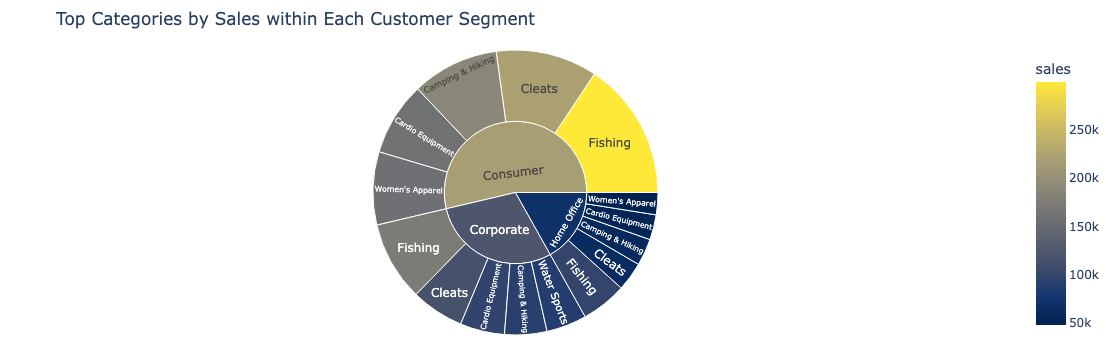

In [30]:
fig = px.sunburst(top_categories, path=['customer_segment', 'category_name'], values='sales',
                  title='Top Categories by Sales within Each Customer Segment',
                  color='sales', color_continuous_scale='Cividis')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))




fig.show()

Now this chart is useful for analyzing how sales are distributed across different customer segments and product categories in a clear, interactive, and visually appealing way.

What are the average order values by country, and which locations have higher spending customers?

Now this is where i wanted to make an interactive map 

In [31]:
# Let's prepare the data for the map first 
avg_order_value = df.groupby('order_country')['sales'].mean().reset_index() #I tried using cutomer_country column but it appears to only be United States and Puerto Rico. So im using the order_country instead. 
avg_order_value.columns = ['Country', 'Average Order Value'] 

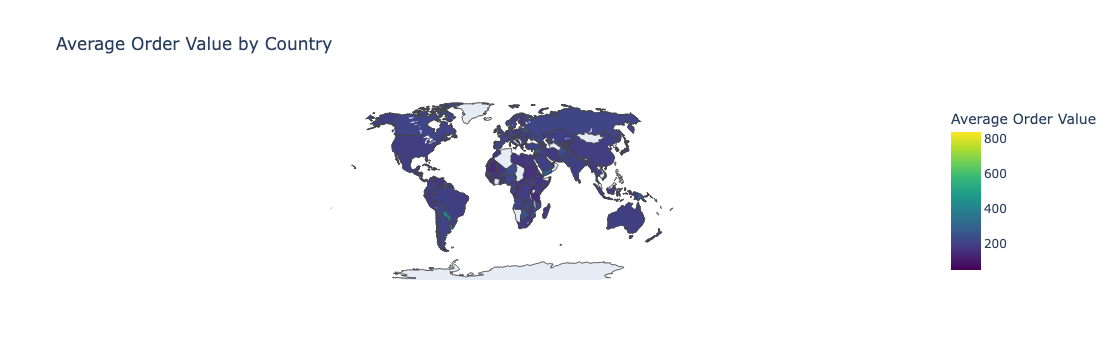

In [32]:
fig = px.choropleth(
    avg_order_value,
    locations="Country",
    locationmode="country names",
    color="Average Order Value",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Average Order Value by Country"
)

fig.update_layout(geo=dict(showframe=False, projection_type="natural earth"))
fig.show()

The map is now displaying countries shaded based on their average order value. When hovering over a country, you can see the country name and its corresponding average order value. But i want to make the map bigger.

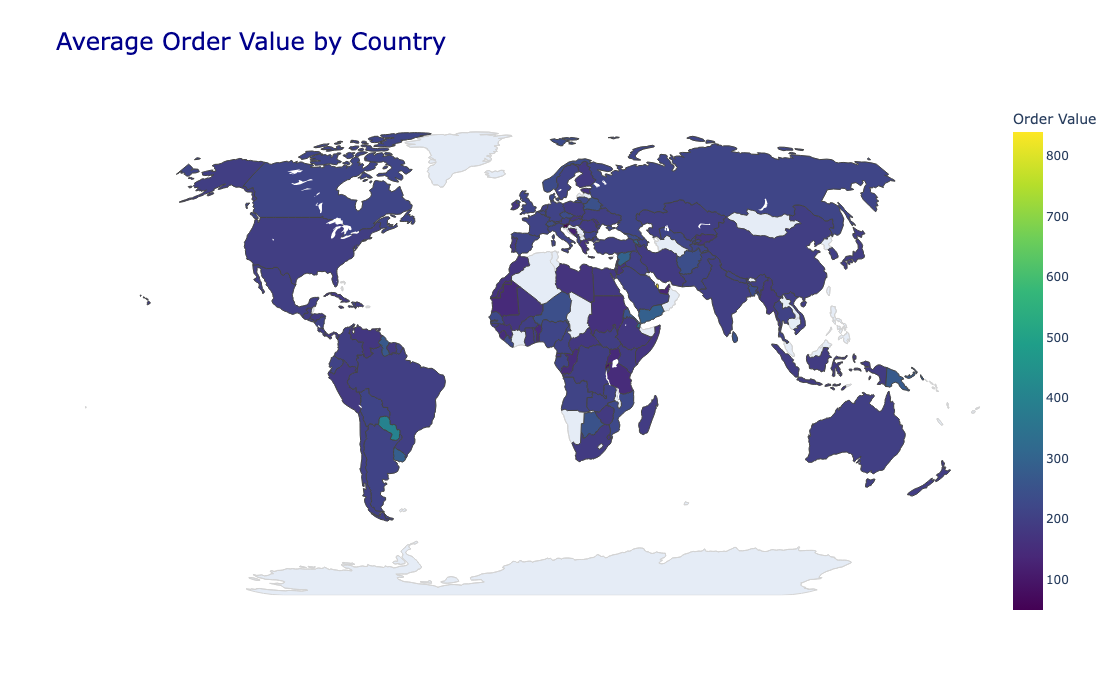

In [33]:

fig.update_layout(
    width=1100,  
    height=700,  
    title_font=dict(size=24, color="darkblue"),  
    geo=dict(
        showframe=False,
        projection_type="natural earth",
        showcountries=True,  # To show country borders
        countrycolor="lightgray",
        coastlinecolor="lightgray",
    ),
    coloraxis_colorbar=dict(
        title="Order Value",
    ),
)

fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Order Value: $%{z:,.2f}"  
)

fig.show()

This type of visualization is helpful for identifying geographical patterns, such as which countries have higher or lower average order values, which could be valuable for businesses targeting specific regions or conducting international market analysis.

Which product categories or departments are the most profitable?

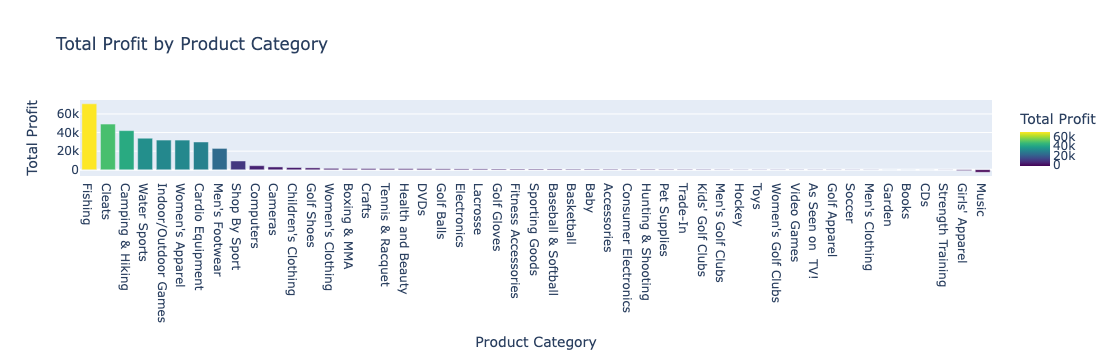

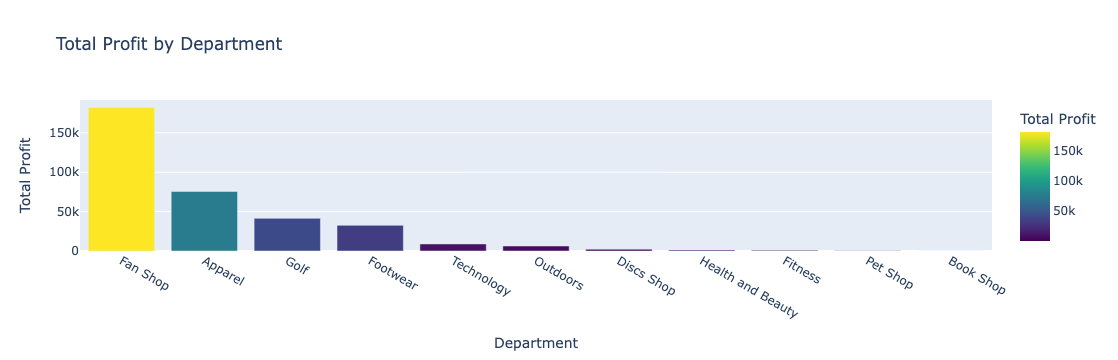

In [34]:
# Aggregating data by category and department, summing the profit
category_profit = df.groupby('category_name').agg({'profit_per_order': 'sum'}).reset_index()
department_profit = df.groupby('department_name').agg({'profit_per_order': 'sum'}).reset_index()

# Creating bar charts
fig_category_bar = px.bar(
    category_profit,
    x='category_name',
    y='profit_per_order',
    title="Total Profit by Product Category",
    labels={'category_name': 'Product Category', 'profit_per_order': 'Total Profit'},
    color='profit_per_order',
    color_continuous_scale='Viridis'
)
fig_category_bar.update_layout(xaxis={'categoryorder': 'total descending'})

fig_department_bar = px.bar(
    department_profit,
    x='department_name',
    y='profit_per_order',
    title="Total Profit by Department",
    labels={'department_name': 'Department', 'profit_per_order': 'Total Profit'},
    color='profit_per_order',
    color_continuous_scale='Viridis'
)
fig_department_bar.update_layout(xaxis={'categoryorder': 'total descending'})


fig_category_bar.show()
fig_department_bar.show()

These bar chart show the total profit for each product category and total profit for each department.
The categories are sorted in descending order based on their total profit. Both charts give an easy-to-understand visual representation of the total profit across different categories and departments, helping to identify which product categories and departments are generating the most profit.

Let's compare sales and profitability across different product categories 

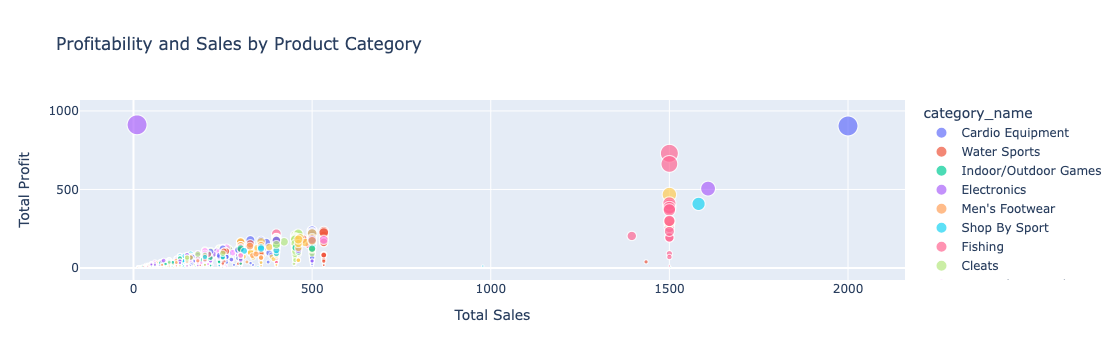

In [35]:
# Data prep for the bubble chart 
# Filter out negative profits (i found this after coming up with an error) 
category_bubble = df[df['profit_per_order'] >= 0]

# Creating the bubble chart
fig_bubble = px.scatter(
    category_bubble,
    x='sales',
    y='profit_per_order',
    size='profit_per_order',
    color='category_name',
    title="Profitability and Sales by Product Category",
    labels={'sales': 'Total Sales', 'profit_per_order': 'Total Profit'},
    hover_name='category_name'
)

fig_bubble.show()

This chart is challenging to read and, despite my efforts to make it informative, it remains overly complex and difficult to interpret. There’s simply too much information, making it hard to discern meaningful insights. I’ve decided not to proceed with this visualization.

*What is the average order value and profit per customer or order region?*

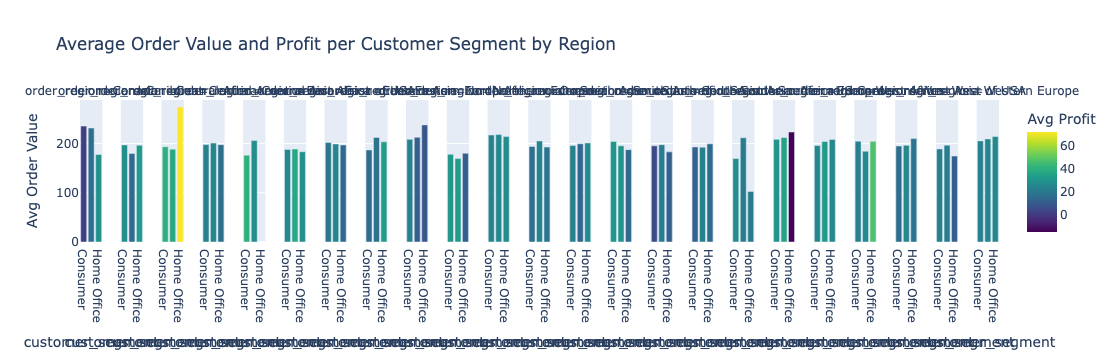

In [36]:
# I'm trying to create a complex bar chart for this one 
# Calculating average order value and profit per customer segment and region
facet_data = df.groupby(['order_region', 'customer_segment']).agg({
    'sales': 'mean',
    'profit_per_order': 'mean'
}).reset_index()
facet_data.rename(columns={'sales': 'avg_order_value', 'profit_per_order': 'avg_profit'}, inplace=True)

# Creating facet grid bar chart
fig_facet = px.bar(
    facet_data,
    x='customer_segment',
    y='avg_order_value',
    color='avg_profit',
    facet_col='order_region',
    color_continuous_scale='Viridis',
    title="Average Order Value and Profit per Customer Segment by Region",
    labels={'avg_order_value': 'Avg Order Value', 'avg_profit': 'Avg Profit'}
)

fig_facet.show()

This looks bad at the first sight but i know i can improve it. Let's focus only on the top 10 contributing contries and de-clutter this chart. 

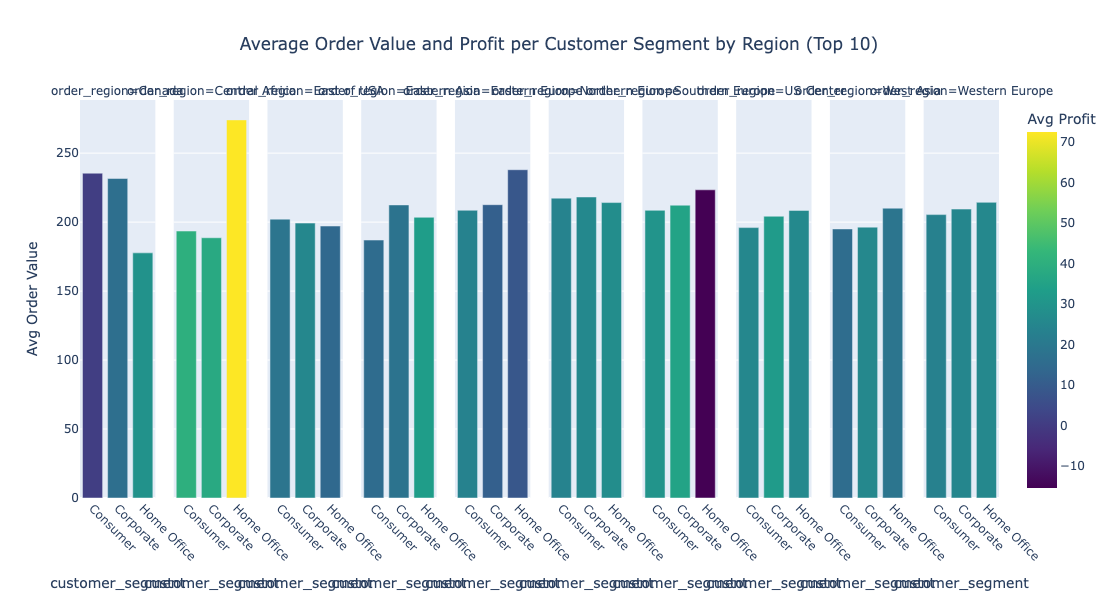

In [37]:

# Calculating total average order value per region and sort by the top 10 regions
region_avg = facet_data.groupby('order_region')['avg_order_value'].mean().reset_index()
top_regions = region_avg.nlargest(10, 'avg_order_value')['order_region'].tolist()

# Filtering the facet data to include only the top 10 regions
facet_data_top = facet_data[facet_data['order_region'].isin(top_regions)]

# Creating facet grid bar chart
fig_facet = px.bar(
    facet_data_top,
    x='customer_segment',
    y='avg_order_value',
    facet_col='order_region',
    color='avg_profit',
    color_continuous_scale='Viridis',
    title="Average Order Value and Profit per Customer Segment by Region (Top 10)",
    labels={'avg_order_value': 'Avg Order Value', 'avg_profit': 'Avg Profit'}
)

# Updating layout to prevent text overlap and improve readability
fig_facet.update_layout(
    title_x=0.5,  
    height=600,
     
)


fig_facet.update_xaxes(tickangle=45)


fig_facet.show()


Now this looks better but still the overlapping text is present. 

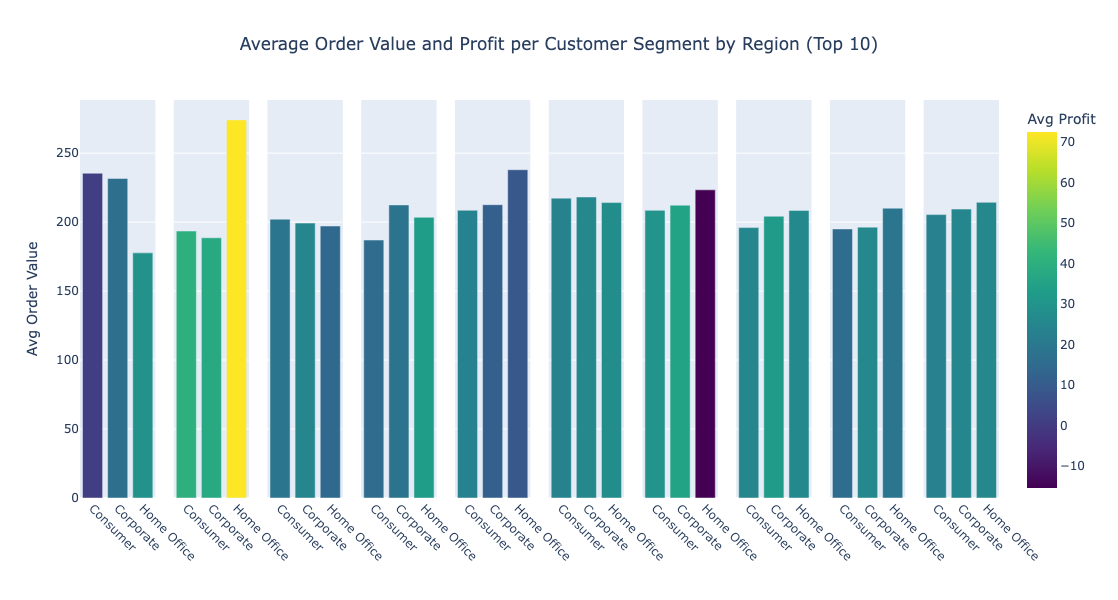

In [38]:
fig_facet = px.bar(
    facet_data_top,
    x='customer_segment',
    y='avg_order_value',
    facet_col='order_region',
    color='avg_profit',
    color_continuous_scale='Viridis',
    title="Average Order Value and Profit per Customer Segment by Region (Top 10)",
    labels={'avg_order_value': 'Avg Order Value', 'avg_profit': 'Avg Profit'}
)


fig_facet.update_layout(
    title_x=0.5,  
    height=600,
    showlegend=True  
)


fig_facet.update_xaxes(tickangle=45) 

# Hiding facet titles (labels on top and bottom)
fig_facet.for_each_annotation(lambda a: a.update(text=""))


fig_facet.update_xaxes(title_text='')  



fig_facet.show()


Now i want to get rid of the grey background and add country names on top of the columns 

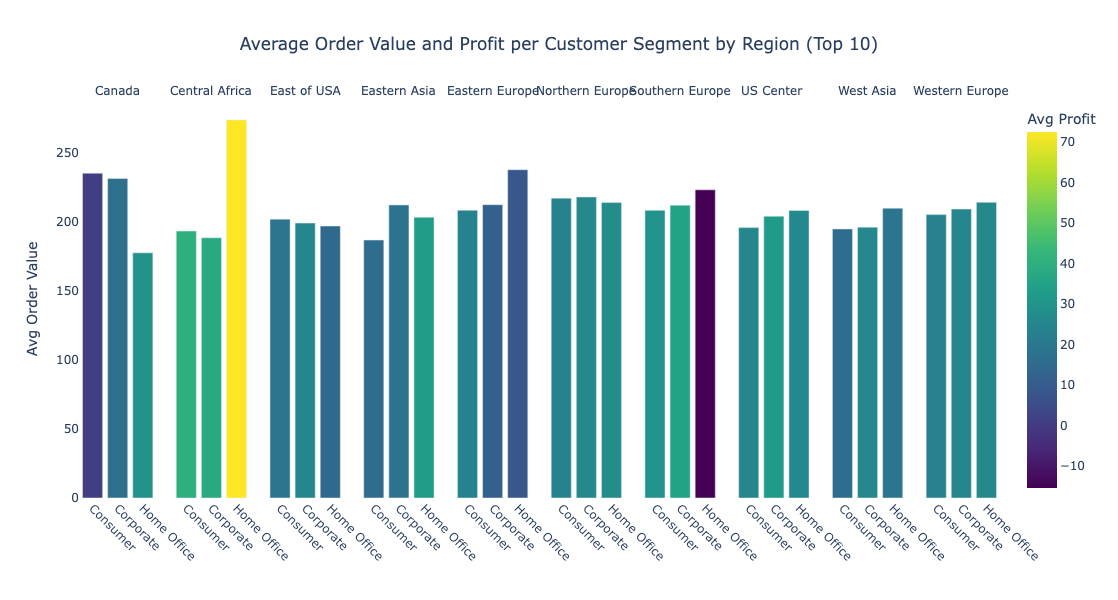

In [39]:
fig_facet = px.bar(
    facet_data_top,
    x='customer_segment',
    y='avg_order_value',
    facet_col='order_region',  
    color='avg_profit',
    color_continuous_scale='Viridis',
    title="Average Order Value and Profit per Customer Segment by Region (Top 10)",
    labels={'avg_order_value': 'Avg Order Value', 'avg_profit': 'Avg Profit'}
)

# Updating layout to remove background color and improve readability
fig_facet.update_layout(
    title_x=0.5,  
    height=600,
    plot_bgcolor='white',  
    paper_bgcolor='white', 
    showlegend=False  
)

fig_facet.update_xaxes(tickangle=45) 

# Hiding facet column titles and show only country names
fig_facet.for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1]))  


fig_facet.update_xaxes(title_text='')  # Removing x-axis title for facet columns

fig_facet.show()


This faceted bar chart compares average order value and average profit across customer segments and regions, allowing us to easily identify the most profitable regions as well as those with negative profits. This view highlights both high-performing segments and areas needing improvement across different regions.








## In this milestone, I created visually appealing charts and explored various relationships within the data, gaining valuable insights. Moving forward, I’ll refine the aesthetics by adjusting the color palette to enhance presentation quality. I’ll also begin developing the dashboard for Milestone 3, using the existing graphs to create an interactive visual experience. ##








### I also want to add more description for the graphs for my final project presentation but im still not sure what graphs i will include ###

# Milestone 3 #

Comment on your question regarding this dataset being synthetic: The real-world dataset that developers fed into a data generation model for sampling and training served as the basis for the dataset I used in this analysis. This method makes the synthetic data a reliable substitute for analysis by preserving the statistical trends, patterns, and correlations of the original dataset. I can demonstrate my ability to extract valuable insights while maintaining the confidentiality and security of the original data by using synthetic data. This is especially helpful for mimicking real-world situations without disclosing private data. Using synthetic data is particularly valuable for scenarios where privacy and security are critical, as it allows for the exploration and presentation of real-world challenges without exposing confidential or proprietary information. Furthermore, I will be working directly with company-provided data in a professional setting, so my objective is to show that I can work with data efficiently, whether it is real or synthetic, and that I can still glean insightful information from synthesized datasets. 

*Which shipping mode is the most commonly used?*

Now i want to add some graphs to get some information on shipping modes in the dataset and see if i can find any patterns.

In [40]:
# Group data by shipping mode
shipping_mode_counts = df['shipping_mode'].value_counts()
shipping_sales_profit = df.groupby('shipping_mode')[['sales', 'profit_per_order']].mean()

/var/folders/th/h5wysqq52w99x0m1_y3_zsbm0000gn/T/ipykernel_23350/1263254825.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




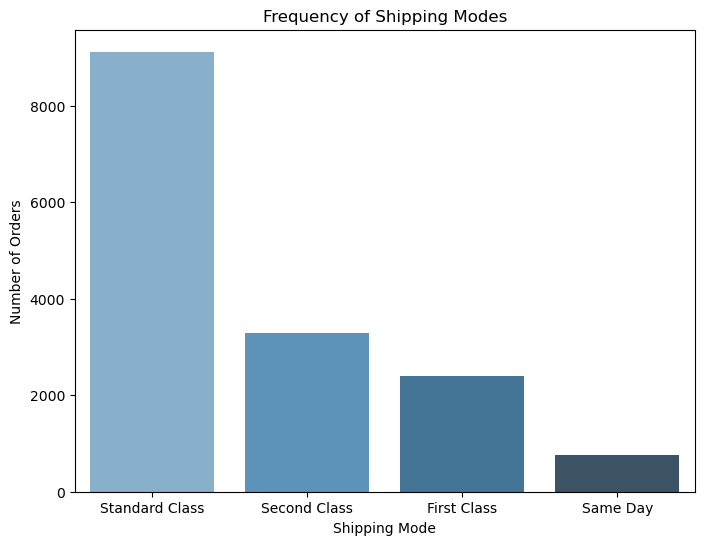

In [41]:
# Bar chart for shipping mode frequency
plt.figure(figsize=(8, 6))
sns.barplot(x=shipping_mode_counts.index, y=shipping_mode_counts.values, palette="Blues_d")
plt.title("Frequency of Shipping Modes")
plt.xlabel("Shipping Mode")
plt.ylabel("Number of Orders")
plt.show()

This looks like a good graph showing the distribution of the shipping modes used. Let's make it look better 

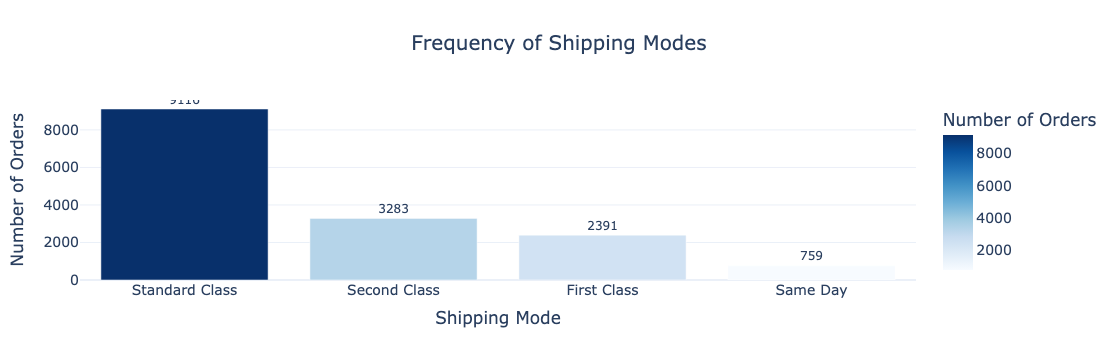

In [51]:
shipping_mode_counts = df['shipping_mode'].value_counts().reset_index()
shipping_mode_counts.columns = ['Shipping Mode', 'Number of Orders']  

# Creating a Plotly bar chart
fig = px.bar(
    shipping_mode_counts,
    x='Shipping Mode',
    y='Number of Orders',
    text='Number of Orders',  
    color='Number of Orders',  
    color_continuous_scale='Blues',  
    title="Frequency of Shipping Modes",
    template='plotly_white'  
)

# Updating layout for aesthetics
fig.update_layout(
    title_font_size=20,
    title_x=0.5,  
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Orders",
    font=dict(size=14),
    plot_bgcolor="rgba(0,0,0,0)",  
    paper_bgcolor="rgba(0,0,0,0)"  
)

# Adding text annotations to bars
fig.update_traces(
    textposition='outside',  
    textfont=dict(size=12)
)


fig.show()

Now i also want to see if the order quantity is affecting the choice of the shipping mode?

/var/folders/th/h5wysqq52w99x0m1_y3_zsbm0000gn/T/ipykernel_23350/1360629708.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




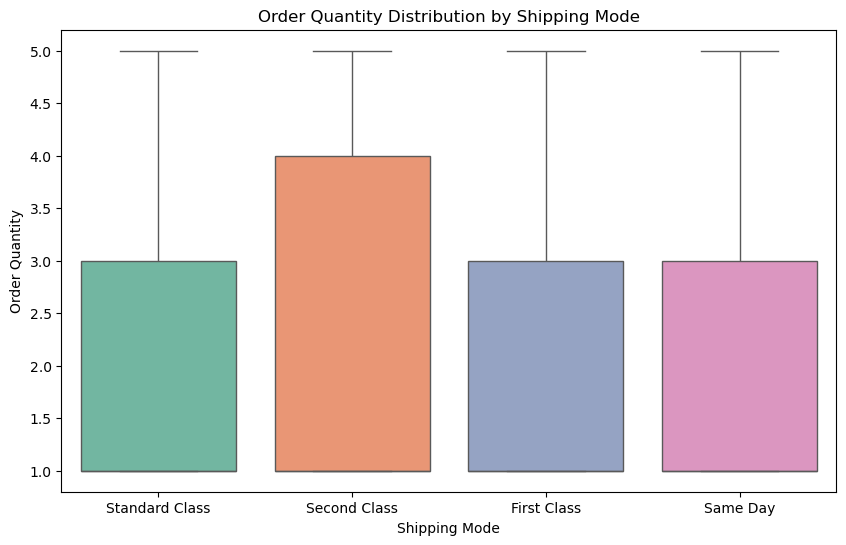

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='shipping_mode', y='order_item_quantity', palette='Set2')
plt.title("Order Quantity Distribution by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Order Quantity")
plt.show()


We can see that the quantity in the order doesnt really affect the choice of the shipping mode. Let's make a bar graph 

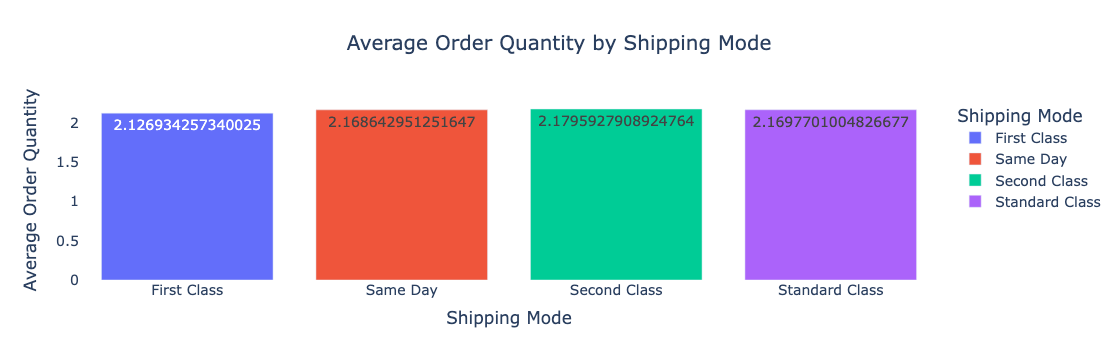

In [56]:
# Bar plot for average order quantity by shipping mode
fig = px.bar(
    df.groupby('shipping_mode')['order_item_quantity'].mean().reset_index(),
    x='shipping_mode', 
    y='order_item_quantity',
    title="Average Order Quantity by Shipping Mode",
    labels={'shipping_mode': 'Shipping Mode', 'order_item_quantity': 'Average Order Quantity'},
    color='shipping_mode',  
    text='order_item_quantity',  
)

# Updating layout for better readability
fig.update_layout(
    title_font_size=20,
    title_x=0.5,  
    xaxis_title="Shipping Mode",
    yaxis_title="Average Order Quantity",
    font=dict(size=14),
    plot_bgcolor="rgba(0,0,0,0)",  
    paper_bgcolor="rgba(0,0,0,0)" 
    
)


fig.show()


The colors appear overly bright and slightly overwhelming, so I plan to adjust them later. Despite this, the graph remains valuable for my analysis.

Now let's see how shipping mode is distributed by customer segment. I want to create a heatmap for this one.

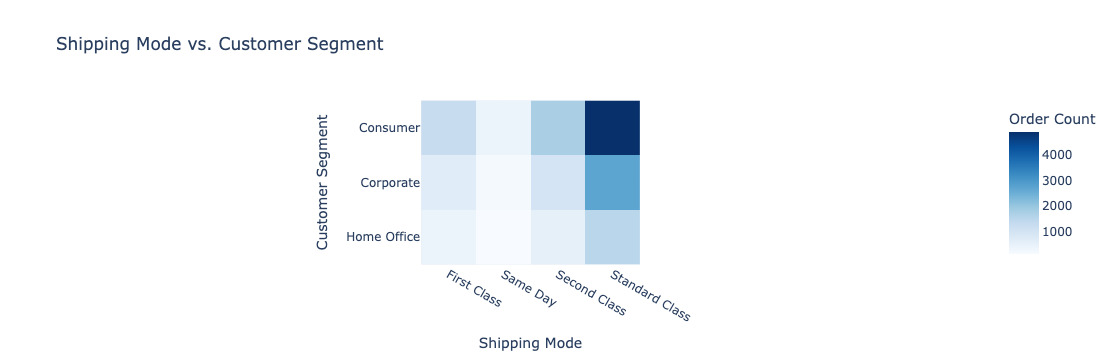

In [57]:
# Calculating shipping mode distribution by customer segment
customer_segment_by_mode = df.groupby(['customer_segment', 'shipping_mode']).size().reset_index(name='count')

# Pivoting the data for heatmap
heatmap_data = customer_segment_by_mode.pivot(index='customer_segment', columns='shipping_mode', values='count')

# Creating the heatmap
fig = px.imshow(
    heatmap_data,
    title="Shipping Mode vs. Customer Segment",
    labels={'x': 'Shipping Mode', 'y': 'Customer Segment', 'color': 'Order Count'},
    color_continuous_scale='Blues'
)

fig.show()



This heatmap reveals that the majority of orders are placed by the consumer segment, with the standard class being their preferred shipping option. Additionally, it highlights that same-day delivery is the least popular choice across all categories.

# Now it's time for the dashboard #

In [46]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [58]:
# Attempt to create a dashboard 

app = dash.Dash(__name__)

app.layout = html.Div([
    # Dashboard Title
    html.H1("Supply Chain Analytics Dashboard", style={'textAlign': 'center'}),
    html.H2("Visualizing Sales, Shipping Modes, and Customer Insights", style={'textAlign': 'center', 'padding': '10px'}),
    
    # Graph 1: Total Monthly Sales
    html.Div([
        html.H3("Total Monthly Sales"),
        dcc.Graph(
            id='monthly-sales',
            figure=px.bar(
                monthly_sales,
                x='month_year',
                y='sales',
                labels={'month_year': 'Month', 'sales': 'Sales'},
                color='sales',
                color_continuous_scale='Blues',
                template='plotly_white'
            ).update_layout(
                updatemenus=[
                    {
                        "buttons": [
                            {"label": "All", "method": "relayout", "args": [{"xaxis.range": [monthly_sales['month_year'].min(), monthly_sales['month_year'].max()]}]},
                            {"label": "2015", "method": "relayout", "args": [{"xaxis.range": ["2015-01-01", "2015-12-31"]}]},
                            {"label": "2016", "method": "relayout", "args": [{"xaxis.range": ["2016-01-01", "2016-12-31"]}]},
                            {"label": "2017", "method": "relayout", "args": [{"xaxis.range": ["2017-01-01", "2017-12-31"]}]},
                            {"label": "2018", "method": "relayout", "args": [{"xaxis.range": ["2018-01-01", "2018-12-31"]}]}
                        ],
                        "direction": "down",
                        "showactive": True,
                    }
                ]
            )
        )
    ], style={'margin': '20px'}), 
    
    # Graph 2: Top Categories by Sales within Each Customer Segment
    html.Div([
        html.H3("Top Categories by Sales within Each Customer Segment"),
        dcc.Graph(
            id='top-categories',
            figure=px.sunburst(
                top_categories,
                path=['customer_segment', 'category_name'],
                values='sales',
                color='sales',
                color_continuous_scale='Cividis'
            ).update_layout(margin=dict(t=50, l=25, r=25, b=25))
        )
    ], style={'margin': '20px'}),  


    # Graph 3: Average Order Value by Country
     html.Div([
        html.H3("Average Order Value by Country"),
        dcc.Graph(
            id='avg-order-value',
            figure=px.choropleth(
                avg_order_value,
                locations="Country",
                locationmode="country names",
                color="Average Order Value",
                hover_name="Country",
                color_continuous_scale="Viridis",
            ).update_layout(
                width=1100,
                height=700, 
title_font=dict(size=24, color="darkblue"),
                geo=dict(
                    showframe=False,
                    projection_type="natural earth",
                    showcountries=True,
                    countrycolor="lightgray",
                    coastlinecolor="lightgray",
                ),
                coloraxis_colorbar=dict(
                    title="Order Value",
                )
            )
        )
    ], style={'margin': '20px'}),


    # Graph 4: Average Order Value and Profit per Customer Segment by Region
    html.Div([
    html.H3("Average Order Value and Profit per Customer Segment by Region (Top 10)"),
    dcc.Graph(
        id='facet-order-value',
        figure=px.bar(
            facet_data_top,
            x='customer_segment',
            y='avg_order_value',
            facet_col='order_region',
            color='avg_profit',
            color_continuous_scale='Viridis',
            labels={'avg_order_value': 'Avg Order Value', 'avg_profit': 'Avg Profit'}
        ).update_layout(
            title_x=0.5,
            height=600,
            plot_bgcolor='white',
            paper_bgcolor='white',
            showlegend=False
        ).update_xaxes(tickangle=45)  # Rotating x-axis labels for readability
        .for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1]))  # Hiding facet column titles and showing only region names
        .update_xaxes(title_text='')  # Removing x-axis title for facet columns
    )
    ], style={'margin': '20px'}),


    # Graph 5: Frequency of Shipping Modes
    html.Div([
        html.H3("Frequency of Shipping Modes"),
        dcc.Graph(
            id='shipping-modes',
            figure=px.bar(
                shipping_mode_counts,
                x='Shipping Mode',
                y='Number of Orders',
                text='Number of Orders',
                color='Number of Orders',
                color_continuous_scale='Blues',
                template='plotly_white'
            ).update_layout(
                title_x=0.5,
                xaxis_title="Shipping Mode",
                yaxis_title="Number of Orders",
                font=dict(size=14),
                plot_bgcolor="rgba(0,0,0,0)",
                paper_bgcolor="rgba(0,0,0,0)"
            ).update_traces(
                textposition='outside',
                textfont=dict(size=12)
            )
        )
    ], style={'margin': '20px'}),

    # Graph 6: Average Order Quantity by Shipping Mode
    html.Div([
    html.H3("Average Order Quantity by Shipping Mode"),
    dcc.Graph(
        id='avg-order-quantity',
        figure=px.bar(
            df.groupby('shipping_mode')['order_item_quantity'].mean().reset_index(),
            x='shipping_mode',
            y='order_item_quantity',
            labels={'shipping_mode': 'Shipping Mode', 'order_item_quantity': 'Average Order Quantity'},
            color='shipping_mode',
            text='order_item_quantity'
        ).update_layout(
            title_x=0.5,
            xaxis_title="Shipping Mode",
            yaxis_title="Average Order Quantity",
            font=dict(size=14),
            plot_bgcolor="rgba(0,0,0,0)",
            paper_bgcolor="rgba(0,0,0,0)"
        ).update_traces(
            texttemplate='%{text:.2f}',  # Formatting the text to 2 decimal places
            textposition='outside',  # Positioning text outside the bars for better readability
        )
    )
], style={'margin': '20px'}), 

    # Graph 7: Shipping Mode vs. Customer Segment Heatmap
    html.Div([
        html.H3("Shipping Mode vs. Customer Segment"),
        dcc.Graph(
            id='heatmap-shipping',
            figure=px.imshow(
                heatmap_data,
                labels={'x': 'Shipping Mode', 'y': 'Customer Segment', 'color': 'Order Count'},
                color_continuous_scale='Blues'
            )
        )
    ], style={'margin': '20px'}),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port = 8050)


I have created a dashboard using graphs I designed earlier. Although it took multiple attempts and required removing non-functional elements to save workspace, I managed to get it running. While I attempted to add more interactivity to the charts within the Dash environment, I haven't succeeded yet but will try again.

Currently, I plan to make some adjustments:

- Change the colors of one graph.
- Resize the map to make it larger.
- Center the titles of the graphs and update their fonts.
    
Overall, I am satisfied with the current progress. My next steps are refining the dashboard further and writing a comprehensive report to summarize the insights gained through these visualizations.






